In [1]:
pip install dask dask-image


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade dask distributed 
!pip install --upgrade dask
!pip install --upgrade dask distributed tornado

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import dask.config

# Set the 'distributed.comm.websockets' configuration
dask.config.set({'distributed.comm.websockets.shard': '16MB'})
dask.config.set({'distributed.comm.tcp.backend': 'tornado'}) # Adjust the size as needed

# Now import the Client
from dask.distributed import Client


In [4]:
!pip install --upgrade bokeh


Defaulting to user installation because normal site-packages is not writeable


In [5]:
client = Client()

In [7]:
import os
from dask import delayed

# Define the data directory containing subdirectories for each class
data_dir = '/home/patel.devki1/Dataset/lung_colon_image_set'

# Define the list to store delayed functions for file path extraction and label assignment
delayed_functions = []

# Define delayed function for extracting file paths and assigning labels
@delayed
def extract_filepaths_and_labels(folder, folderpath):
    filepaths = []
    labels = []
    folderlist = os.listdir(folderpath)
    
    for fileimage in folderlist:
        fileimagepath = os.path.join(folderpath, fileimage)
        filepaths.append(fileimagepath)

        if folder == 'colon_aca':
            labels.append('Colon Adenocarcinoma')
        elif folder == 'colon_n':
            labels.append('Colon Benign Tissue')
        elif folder == 'lung_aca':
            labels.append('Lung Adenocarcinoma')
        elif folder == 'lung_n':
            labels.append('Lung Benign Tissue')
        elif folder == 'lung_scc':
            labels.append('Lung Squamous Cell Carcinoma')

    return filepaths, labels

# Get the list of folders (classes) in the data directory
folders = os.listdir(data_dir)
folders = [f for f in folders if not str(f).__contains__('.ipynb_checkpoints')]

# Create delayed functions for each folder
for folder in folders:
    folderpath = os.path.join(data_dir, folder)
    delayed_func = extract_filepaths_and_labels(folder, folderpath)
    delayed_functions.append(delayed_func)

# Compute the delayed functions to get the file paths and labels
computed_results = dask.compute(*delayed_functions)

# Unpack the computed results
filepaths = []
labels = []
for result in computed_results:
    result_filepaths, result_labels = result
    filepaths.extend(result_filepaths)
    labels.extend(result_labels)

# Print the extracted file paths and labels
print("File Paths:")
print(filepaths[:5])  # Print the first 5 file paths for demonstration
print("Labels:")
print(labels[:5])  # Print the first 5 labels for demonstration


File Paths:
['/home/patel.devki1/Dataset/lung_colon_image_set/colon_aca/colonca1.jpeg', '/home/patel.devki1/Dataset/lung_colon_image_set/colon_aca/colonca10.jpeg', '/home/patel.devki1/Dataset/lung_colon_image_set/colon_aca/colonca100.jpeg', '/home/patel.devki1/Dataset/lung_colon_image_set/colon_aca/colonca1000.jpeg', '/home/patel.devki1/Dataset/lung_colon_image_set/colon_aca/colonca1001.jpeg']
Labels:
['Colon Adenocarcinoma', 'Colon Adenocarcinoma', 'Colon Adenocarcinoma', 'Colon Adenocarcinoma', 'Colon Adenocarcinoma']


In [9]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


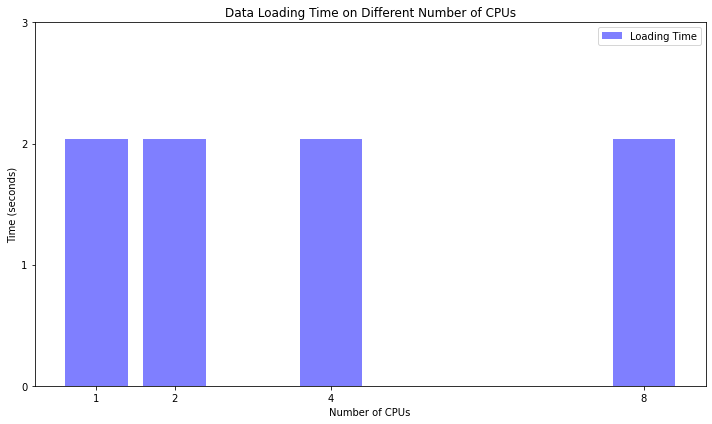

In [13]:
# import dask
# from dask import delayed
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# # Define delayed function for simulating data loading
# @delayed
# def load_data_task(data):
#     # Simulate data loading operation (e.g., reading from disk)
#     time.sleep(1)  # Simulate loading time (1 second delay)
#     return data

# # Create delayed tasks for data loading
# tasks_1_cpu = [load_data_task(i) for i in range(10)]  # 10 tasks for 1 CPU
# tasks_2_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 2 CPUs
# tasks_4_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 4 CPUs
# tasks_8_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 8 CPUs

# # Execute delayed tasks and measure execution time for each configuration
# execution_times = []
# for tasks, num_cpus in [(tasks_1_cpu, 1), (tasks_2_cpus, 2), (tasks_4_cpus, 4), (tasks_8_cpus, 8)]:
#     start_time = time.time()
#     loaded_data = dask.compute(*tasks, num_workers=num_cpus)
#     end_time = time.time()
#     execution_time = end_time - start_time
#     execution_times.append(execution_time)

# # Plot the loading times for each configuration
# plt.figure(figsize=(10, 6))
# plt.bar([1, 2, 4, 8], execution_times, color='blue', alpha=0.5, label='Loading Time')
# plt.xlabel('Number of CPUs')
# plt.ylabel('Time (seconds)')
# plt.title('Data Loading Time on Different Number of CPUs')
# plt.xticks([1, 2, 4, 8])
# plt.yticks(np.arange(0, max(execution_times) + 1, 1))
# plt.legend()
# plt.tight_layout()

# # Show the plot
# plt.show()


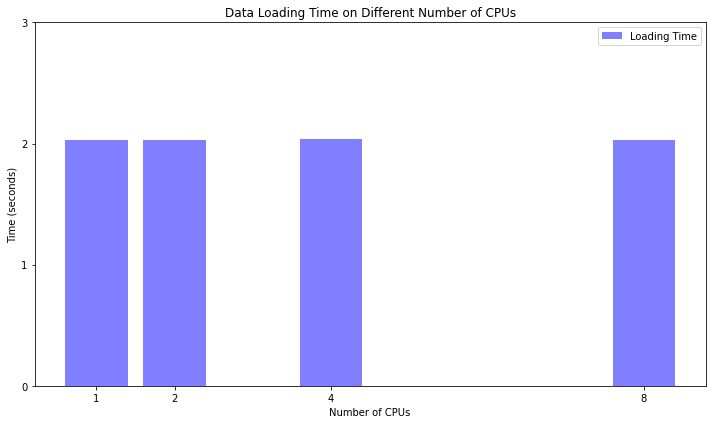

In [1]:
# from dask.distributed import Client
# from dask import delayed
# import matplotlib.pyplot as plt
# import numpy as np
# import time
# import multiprocessing

# # Set up Dask client with a multiprocessing scheduler
# client = Client(processes=False)  # False for multiprocessing, True for multithreading

# # Define delayed function for simulating data loading
# @delayed
# def load_data_task(data):
#     # Simulate data loading operation (e.g., reading from disk)
#     time.sleep(1)  # Simulate loading time (1 second delay)
#     return data

# # Create delayed tasks for data loading
# tasks_1_cpu = [load_data_task(i) for i in range(10)]  # 10 tasks for 1 CPU
# tasks_2_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 2 CPUs
# tasks_4_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 4 CPUs
# tasks_8_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 8 CPUs

# # Execute delayed tasks and measure execution time for each configuration
# execution_times = []
# for tasks, num_cpus in [(tasks_1_cpu, 1), (tasks_2_cpus, 2), (tasks_4_cpus, 4), (tasks_8_cpus, 8)]:
#     start_time = time.time()
#     loaded_data = client.compute(tasks)
#     _ = client.gather(loaded_data)  # Wait for data to be computed
#     end_time = time.time()
#     execution_time = end_time - start_time
#     execution_times.append(execution_time)

# # Plot the loading times for each configuration
# plt.figure(figsize=(10, 6))
# plt.bar([1, 2, 4, 8], execution_times, color='blue', alpha=0.5, label='Loading Time')
# plt.xlabel('Number of CPUs')
# plt.ylabel('Time (seconds)')
# plt.title('Data Loading Time on Different Number of CPUs')
# plt.xticks([1, 2, 4, 8])
# plt.yticks(np.arange(0, max(execution_times) + 1, 1))
# plt.legend()
# plt.tight_layout()

# # Show the plot
# plt.show()

# # Close the Dask client
# client.close()


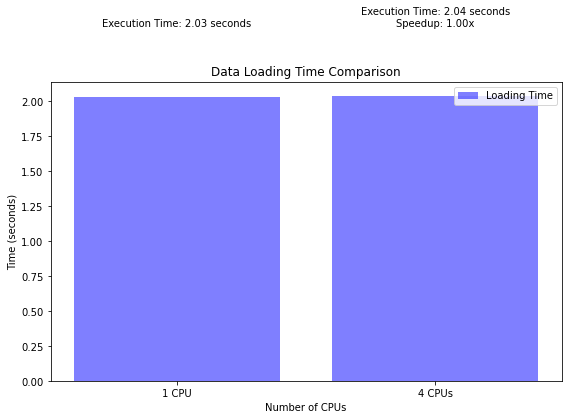

In [2]:
from dask.distributed import Client
from dask import delayed
import matplotlib.pyplot as plt
import numpy as np
import time
import multiprocessing

# Set up Dask client with a multiprocessing scheduler
client = Client(processes=False)  # False for multiprocessing, True for multithreading

# Define delayed function for simulating data loading
@delayed
def load_data_task(data):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(1)  # Simulate loading time (1 second delay)
    return data

# Create delayed tasks for data loading
tasks_1_cpu = [load_data_task(i) for i in range(10)]  # 10 tasks for 1 CPU
tasks_4_cpus = [load_data_task(i) for i in range(10)]  # 10 tasks for 4 CPUs

# Measure execution time for loading data on 1 CPU
start_time_1_cpu = time.time()
_ = client.compute(tasks_1_cpu)
_ = client.gather(_)  # Wait for data to be computed
end_time_1_cpu = time.time()
execution_time_1_cpu = end_time_1_cpu - start_time_1_cpu

# Measure execution time for loading data on 4 CPUs
start_time_4_cpus = time.time()
_ = client.compute(tasks_4_cpus)
_ = client.gather(_)  # Wait for data to be computed
end_time_4_cpus = time.time()
execution_time_4_cpus = end_time_4_cpus - start_time_4_cpus

# Calculate speedup
speedup = execution_time_1_cpu / execution_time_4_cpus

# Plot the speedup
plt.figure(figsize=(8, 6))
plt.bar(['1 CPU', '4 CPUs'], [execution_time_1_cpu, execution_time_4_cpus], color='blue', alpha=0.5, label='Loading Time')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.text(0, execution_time_1_cpu + 0.5, f'Execution Time: {execution_time_1_cpu:.2f} seconds', ha='center')
plt.text(1, execution_time_4_cpus + 0.5, f'Execution Time: {execution_time_4_cpus:.2f} seconds\nSpeedup: {speedup:.2f}x', ha='center')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Close the Dask client
client.close()


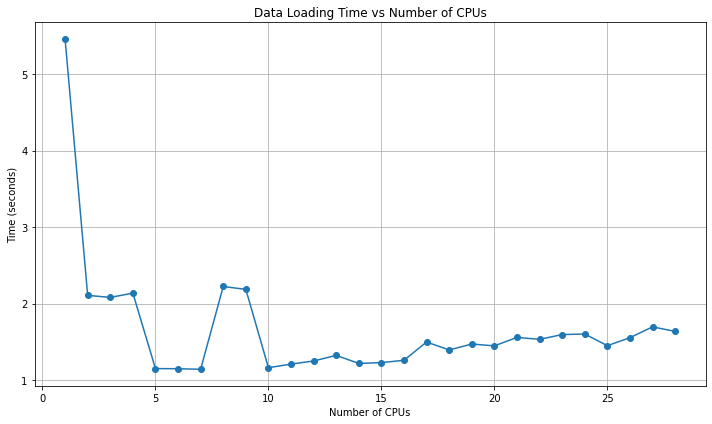

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import multiprocessing
from dask.distributed import Client
from dask import delayed

# Define delayed function for simulating data loading
@delayed
def load_data_task(data):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(1)  # Simulate loading time (1 second delay)
    return data

# Create delayed tasks for data loading
def create_tasks(num_tasks):
    return [load_data_task(i) for i in range(num_tasks)]

# Measure execution time for loading data on different numbers of CPUs
def measure_execution_time(num_cpus, tasks):
    start_time = time.time()
    with Client(processes=False, n_workers=num_cpus) as client:
        loaded_data = client.compute(tasks)
        _ = client.gather(loaded_data)  # Wait for data to be computed
    end_time = time.time()
    return end_time - start_time

# Number of tasks (data points) to load
num_tasks = 10

# List to store results
execution_times = []
num_cpus_list = []

# Vary the number of CPUs and measure execution time
for num_cpus in range(1, multiprocessing.cpu_count() + 1):
    tasks = create_tasks(num_tasks)
    execution_time = measure_execution_time(num_cpus, tasks)
    execution_times.append(execution_time)
    num_cpus_list.append(num_cpus)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(num_cpus_list, execution_times, marker='o')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.title('Data Loading Time vs Number of CPUs')
plt.grid(True)
plt.tight_layout()
plt.show()


/home/patel.devki1/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40038 instead
  warnings.warn(


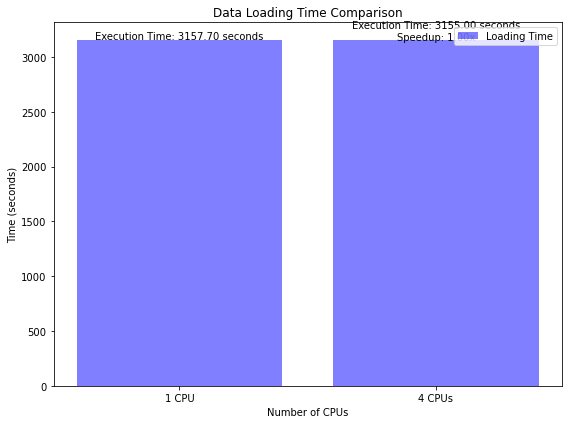

In [3]:
# without batch_size
from dask.distributed import Client
from dask import delayed
import matplotlib.pyplot as plt
import time
import os
import multiprocessing

# Set up Dask client with a multiprocessing scheduler
client = Client(processes=False)  # False for multiprocessing, True for multithreading

# Define delayed function for reading image files
@delayed
def read_image(filename):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(1)  # Simulate loading time (1 second delay)
    return filename

# Define a function to load images from subdirectories
def load_images_from_subdirectories(parent_directory):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    return [read_image(filename) for filename in all_filenames]

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Create delayed tasks for data loading
tasks_1_cpu = load_images_from_subdirectories(parent_directory)  # Load images on 1 CPU
tasks_4_cpus = load_images_from_subdirectories(parent_directory)  # Load images on 4 CPUs

# Measure execution time for loading data on 1 CPU
start_time_1_cpu = time.time()
_ = client.compute(tasks_1_cpu)
_ = client.gather(_)  # Wait for data to be computed
end_time_1_cpu = time.time()
execution_time_1_cpu = end_time_1_cpu - start_time_1_cpu

# Measure execution time for loading data on 4 CPUs
start_time_4_cpus = time.time()
_ = client.compute(tasks_4_cpus)
_ = client.gather(_)  # Wait for data to be computed
end_time_4_cpus = time.time()
execution_time_4_cpus = end_time_4_cpus - start_time_4_cpus

# Calculate speedup
speedup = execution_time_1_cpu / execution_time_4_cpus

# Plot the speedup
plt.figure(figsize=(8, 6))
plt.bar(['1 CPU', '4 CPUs'], [execution_time_1_cpu, execution_time_4_cpus], color='blue', alpha=0.5, label='Loading Time')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.text(0, execution_time_1_cpu + 0.5, f'Execution Time: {execution_time_1_cpu:.2f} seconds', ha='center')
plt.text(1, execution_time_4_cpus + 0.5, f'Execution Time: {execution_time_4_cpus:.2f} seconds\nSpeedup: {speedup:.2f}x', ha='center')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Close the Dask client
client.close()


/home/patel.devki1/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44226 instead
  warnings.warn(


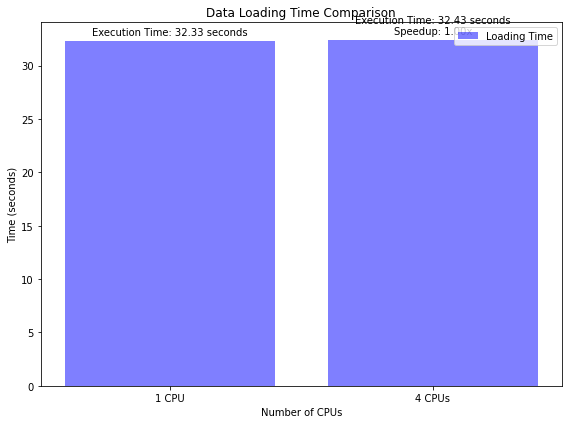

In [6]:
from dask.distributed import Client
from dask import delayed
import matplotlib.pyplot as plt
import time
import os
import multiprocessing

# Set up Dask client with a multiprocessing scheduler
client = Client(processes=False)  # False for multiprocessing, True for multithreading

# Define delayed function for reading image files
@delayed
def read_image_batch(filenames):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(1)  # Simulate loading time (1 second delay)
    return filenames

# Define a function to load images from subdirectories and batch process
def load_images_from_subdirectories_batch(parent_directory):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    # Batch process filenames into groups (e.g., batch_size = 10)
    batch_size = 100
    batched_filenames = [all_filenames[i:i + batch_size] for i in range(0, len(all_filenames), batch_size)]
    return [read_image_batch(batch) for batch in batched_filenames]

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Preprocess data and create delayed tasks for data loading
batched_tasks_1_cpu = load_images_from_subdirectories_batch(parent_directory)  # Load images on 1 CPU
batched_tasks_4_cpus = load_images_from_subdirectories_batch(parent_directory)  # Load images on 4 CPUs

# Measure execution time for loading data on 1 CPU
start_time_1_cpu = time.time()
_ = client.compute(batched_tasks_1_cpu)
_ = client.gather(_)  # Wait for data to be computed
end_time_1_cpu = time.time()
execution_time_1_cpu = end_time_1_cpu - start_time_1_cpu

# Measure execution time for loading data on 4 CPUs
start_time_4_cpus = time.time()
_ = client.compute(batched_tasks_4_cpus)
_ = client.gather(_)  # Wait for data to be computed
end_time_4_cpus = time.time()
execution_time_4_cpus = end_time_4_cpus - start_time_4_cpus

# Calculate speedup
speedup = execution_time_1_cpu / execution_time_4_cpus

# Plot the speedup
plt.figure(figsize=(8, 6))
plt.bar(['1 CPU', '4 CPUs'], [execution_time_1_cpu, execution_time_4_cpus], color='blue', alpha=0.5, label='Loading Time')
plt.xlabel('Number of CPUs')
plt.ylabel('Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.text(0, execution_time_1_cpu + 0.5, f'Execution Time: {execution_time_1_cpu:.2f} seconds', ha='center')
plt.text(1, execution_time_4_cpus + 0.5, f'Execution Time: {execution_time_4_cpus:.2f} seconds\nSpeedup: {speedup:.2f}x', ha='center')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Close the Dask client
client.close()


/home/patel.devki1/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34885 instead
  warnings.warn(


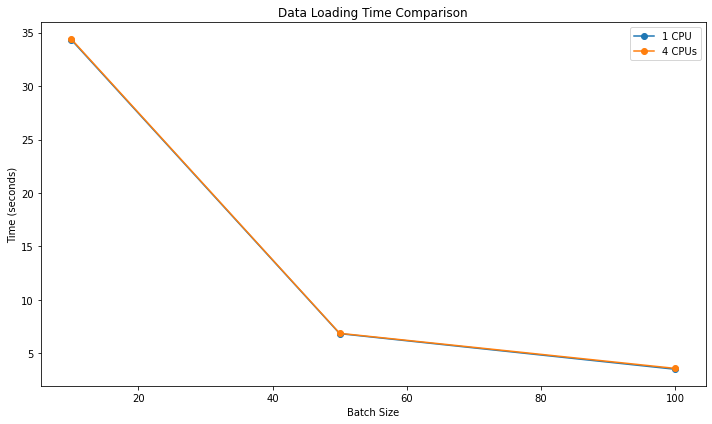

In [5]:
from dask.distributed import Client
from dask import delayed
import matplotlib.pyplot as plt
import time
import os
import multiprocessing

# Set up Dask client with a multiprocessing scheduler
client = Client(processes=False)  # False for multiprocessing, True for multithreading

# Define delayed function for reading image files
@delayed
def read_image_batch(filenames):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(0.1)  # Reduced sleep time for faster simulation
    return filenames

# Define a function to load images from subdirectories and batch process
def load_images_from_subdirectories_batch(parent_directory, batch_size):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    # Batch process filenames into groups
    batched_filenames = [all_filenames[i:i + batch_size] for i in range(0, len(all_filenames), batch_size)]
    return [read_image_batch(batch) for batch in batched_filenames]

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Experiment with different batch sizes
batch_sizes = [10, 50, 100]  # Adjust as needed

# Measure execution times for different batch sizes on 1 CPU and 4 CPUs
execution_times_1_cpu = []
execution_times_4_cpus = []

for batch_size in batch_sizes:
    # Create delayed tasks for data loading with the current batch size
    batched_tasks_1_cpu = load_images_from_subdirectories_batch(parent_directory, batch_size)  # Load images on 1 CPU
    batched_tasks_4_cpus = load_images_from_subdirectories_batch(parent_directory, batch_size)  # Load images on 4 CPUs

    # Measure execution time for loading data on 1 CPU
    start_time_1_cpu = time.time()
    _ = client.compute(batched_tasks_1_cpu)
    _ = client.gather(_)  # Wait for data to be computed
    end_time_1_cpu = time.time()
    execution_time_1_cpu = end_time_1_cpu - start_time_1_cpu
    execution_times_1_cpu.append(execution_time_1_cpu)

    # Measure execution time for loading data on 4 CPUs
    start_time_4_cpus = time.time()
    _ = client.compute(batched_tasks_4_cpus)
    _ = client.gather(_)  # Wait for data to be computed
    end_time_4_cpus = time.time()
    execution_time_4_cpus = end_time_4_cpus - start_time_4_cpus
    execution_times_4_cpus.append(execution_time_4_cpus)

# Plot the execution times for different batch sizes
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, execution_times_1_cpu, marker='o', label='1 CPU')
plt.plot(batch_sizes, execution_times_4_cpus, marker='o', label='4 CPUs')
plt.xlabel('Batch Size')
plt.ylabel('Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Close the Dask client
client.close()


/home/patel.devki1/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46195 instead
  warnings.warn(


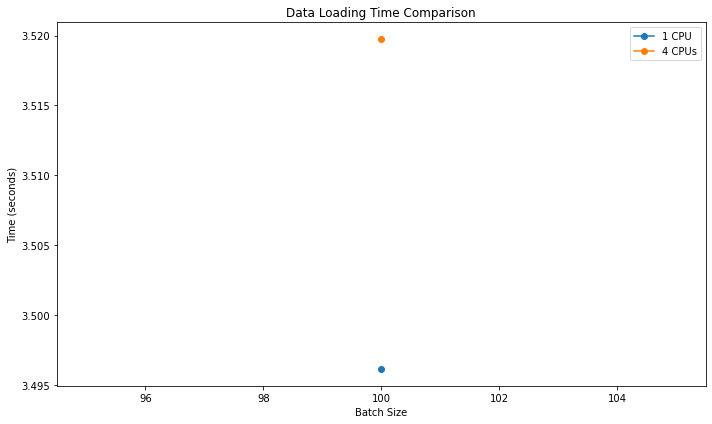

In [7]:
from dask.distributed import Client
from dask import delayed
import matplotlib.pyplot as plt
import time
import os
import multiprocessing

# Set up Dask client with a multiprocessing scheduler
client = Client(processes=False)  # False for multiprocessing, True for multithreading

# Define delayed function for reading image files
@delayed
def read_image_batch(filenames):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(0.1)  # Reduced sleep time for faster simulation
    return filenames

# Define a function to load images from subdirectories and batch process
def load_images_from_subdirectories_batch(parent_directory, batch_size):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    # Batch process filenames into groups
    batched_filenames = [all_filenames[i:i + batch_size] for i in range(0, len(all_filenames), batch_size)]
    return [read_image_batch(batch) for batch in batched_filenames]

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Experiment with different batch sizes
batch_sizes = [100]  # Adjust as needed

# Measure execution times for different batch sizes on 1 CPU and 4 CPUs
execution_times_1_cpu = []
execution_times_4_cpus = []

for batch_size in batch_sizes:
    # Create delayed tasks for data loading with the current batch size
    batched_tasks_1_cpu = load_images_from_subdirectories_batch(parent_directory, batch_size)  # Load images on 1 CPU
    batched_tasks_4_cpus = load_images_from_subdirectories_batch(parent_directory, batch_size)  # Load images on 4 CPUs

    # Measure execution time for loading data on 1 CPU
    start_time_1_cpu = time.time()
    _ = client.compute(batched_tasks_1_cpu)
    _ = client.gather(_)  # Wait for data to be computed
    end_time_1_cpu = time.time()
    execution_time_1_cpu = end_time_1_cpu - start_time_1_cpu
    execution_times_1_cpu.append(execution_time_1_cpu)

    # Measure execution time for loading data on 4 CPUs
    start_time_4_cpus = time.time()
    _ = client.compute(batched_tasks_4_cpus)
    _ = client.gather(_)  # Wait for data to be computed
    end_time_4_cpus = time.time()
    execution_time_4_cpus = end_time_4_cpus - start_time_4_cpus
    execution_times_4_cpus.append(execution_time_4_cpus)

# Plot the execution times for different batch sizes
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, execution_times_1_cpu, marker='o', label='1 CPU')
plt.plot(batch_sizes, execution_times_4_cpus, marker='o', label='4 CPUs')
plt.xlabel('Batch Size')
plt.ylabel('Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Close the Dask client
client.close()


In [8]:
#Without multiprocessing pool() 
from dask.distributed import Client, LocalCluster
from dask import delayed
import time
import os

# Create a Dask cluster with 4 workers (CPUs)
cluster = LocalCluster(n_workers=4)
client = Client(cluster)

# Define delayed function for reading image files
@delayed
def read_image(filename):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(1)  # Simulate loading time (1 second delay)
    return filename

# Define a function to load images from subdirectories
def load_images_from_subdirectories(parent_directory):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    return [read_image(filename) for filename in all_filenames]

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Create delayed tasks for data loading
delayed_tasks = load_images_from_subdirectories(parent_directory)

# Measure execution time for loading data on 4 CPUs
start_time = time.time()
results = client.compute(delayed_tasks)
results = client.gather(results)  # Wait for data to be computed
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

# Close the Dask client and cluster
client.close()
cluster.close()


/home/patel.devki1/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41448 instead
  warnings.warn(


Execution Time: 3151.372353553772 seconds


/home/patel.devki1/.local/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35623 instead
  warnings.warn(


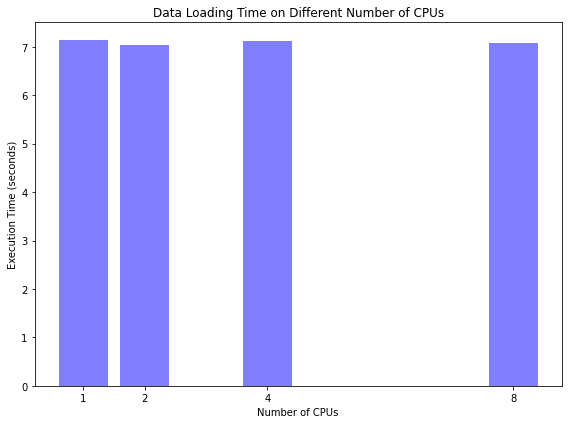

In [10]:
from dask.distributed import Client, LocalCluster
from dask import delayed
import matplotlib.pyplot as plt
import time
import os

# Create a Dask cluster with 4 workers (CPUs)
cluster = LocalCluster(n_workers=4)
client = Client(cluster)

# Define delayed function for reading image files
@delayed
def read_image_batch(filenames):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(0.1)  # Reduced sleep time for faster simulation
    return filenames

# Define a function to load images from subdirectories and batch process
def load_images_from_subdirectories_batch(parent_directory, batch_size):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    # Batch process filenames into groups
    batched_filenames = [all_filenames[i:i + batch_size] for i in range(0, len(all_filenames), batch_size)]
    return [read_image_batch(batch) for batch in batched_filenames]

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Experiment with different batch sizes
batch_size = 50

# Measure execution times for different numbers of CPUs
num_cpus_list = [1, 2, 4, 8]
execution_times = []

for num_cpus in num_cpus_list:
    # Create delayed tasks for data loading with the current batch size and number of CPUs
    batched_tasks = load_images_from_subdirectories_batch(parent_directory, batch_size)

    # Measure execution time for loading data with the current number of CPUs
    start_time = time.time()
    _ = client.compute(batched_tasks)
    _ = client.gather(_)  # Wait for data to be computed
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot the execution times for different numbers of CPUs
plt.figure(figsize=(8, 6))
plt.bar(num_cpus_list, execution_times, color='blue', alpha=0.5)
plt.xlabel('Number of CPUs')
plt.ylabel('Execution Time (seconds)')
plt.title('Data Loading Time on Different Number of CPUs')
plt.xticks(num_cpus_list)
plt.tight_layout()
plt.show()

# Close the Dask client and cluster
client.close()
cluster.close()


In [11]:
#multiprocessing data loading using multiprocessing.pool()
import multiprocessing
import os
import time

# Define a function to read image batches (simulated data loading)
def read_image_batch(filenames):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(0.1)  # Reduced sleep time for faster simulation
    return filenames

# Define a function to load images from subdirectories and batch process
def load_images_from_subdirectories_batch(parent_directory, batch_size):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    # Batch process filenames into groups
    batched_filenames = [all_filenames[i:i + batch_size] for i in range(0, len(all_filenames), batch_size)]
    return batched_filenames

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Experiment with different batch sizes
batch_size = 100

# Load images from subdirectories and batch process
batched_filenames = load_images_from_subdirectories_batch(parent_directory, batch_size)

# Initialize a multiprocessing pool with the desired number of processes (CPUs)
num_cpus = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=num_cpus)

# Measure execution time for loading data using multiprocessing.Pool
start_time = time.time()
results = pool.map(read_image_batch, batched_filenames)
end_time = time.time()
execution_time = end_time - start_time

# Close the multiprocessing pool
pool.close()
pool.join()

# Print the execution time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.9485983848571777 seconds


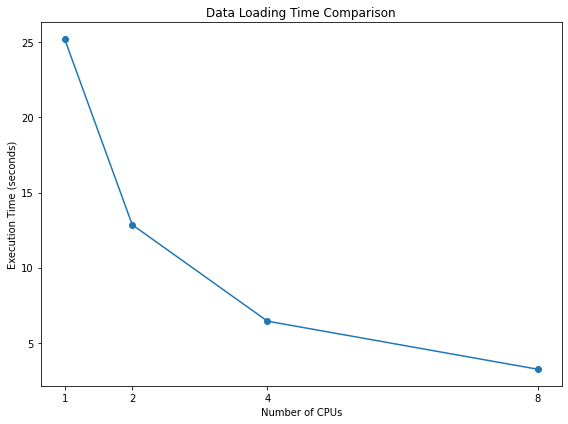

In [12]:
#plot of difference
import multiprocessing
import os
import time
import matplotlib.pyplot as plt

# Define a function to read image batches (simulated data loading)
def read_image_batch(filenames):
    # Simulate data loading operation (e.g., reading from disk)
    time.sleep(0.1)  # Reduced sleep time for faster simulation
    return filenames

# Define a function to load images from subdirectories and batch process
def load_images_from_subdirectories_batch(parent_directory, batch_size):
    subdirectories = [os.path.join(parent_directory, subdir) for subdir in os.listdir(parent_directory) if not subdir.startswith('.')]
    all_filenames = []
    for subdir in subdirectories:
        filenames = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if not filename.startswith('.')]
        all_filenames.extend(filenames)
    # Batch process filenames into groups
    batched_filenames = [all_filenames[i:i + batch_size] for i in range(0, len(all_filenames), batch_size)]
    return batched_filenames

# Define the directory containing subdirectories
parent_directory = "/home/patel.devki1/Dataset/lung_colon_image_set"

# Experiment with different batch sizes
batch_size = 100

# Initialize lists to store execution times and number of CPUs
execution_times = []
num_cpus_list = [1, 2, 4, 8]

for num_cpus in num_cpus_list:
    # Load images from subdirectories and batch process
    batched_filenames = load_images_from_subdirectories_batch(parent_directory, batch_size)

    # Initialize a multiprocessing pool with the desired number of processes (CPUs)
    pool = multiprocessing.Pool(processes=num_cpus)

    # Measure execution time for loading data using multiprocessing.Pool
    start_time = time.time()
    results = pool.map(read_image_batch, batched_filenames)
    end_time = time.time()
    execution_time = end_time - start_time

    # Close the multiprocessing pool
    pool.close()
    pool.join()

    execution_times.append(execution_time)

# Plot the execution times for different numbers of CPUs
plt.figure(figsize=(8, 6))
plt.plot(num_cpus_list, execution_times, marker='o')
plt.xlabel('Number of CPUs')
plt.ylabel('Execution Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.xticks(num_cpus_list)
plt.tight_layout()
plt.show()
